# Proyek Analisis Data: E-commerce Publik Dataset
- **Nama:** RAFI RIZKI SETIAWAN
- **Email:** rafirizkikiki@gmail.com
- **ID Dicoding:** rafirizkisetiawan

## Menentukan Pertanyaan Bisnis

- Daerah mana yang menghasilkan customer terbanyak sampai tersedikit dalam melakukan order product?
- Pembayaran apa saja yang paling banyak hingga paling sedikit digunakan oleh customer?

## Import Semua Packages/Library yang Digunakan

In [114]:
import seaborn as sns

In [115]:
import pandas as pd

In [116]:
import matplotlib.pyplot as plt

In [117]:
import numpy as np

## Data Wrangling

### Gathering Data

In [118]:
customers_dataset_df = pd.read_csv("data/customers_dataset.csv")
customers_dataset_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [119]:
geolocation_dataset_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_dataset_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [120]:
order_items_dataset_df = pd.read_csv("data/order_items_dataset.csv")
order_items_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [121]:
order_payments_dataset_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_dataset_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [122]:
order_reviews_dataset_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_dataset_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [123]:
orders_dataset_df = pd.read_csv("data/orders_dataset.csv")
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [124]:
product_category_name_translation_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [125]:
products_dataset_df = pd.read_csv("data/products_dataset.csv")
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [126]:
sellers_dataset_df = pd.read_csv("data/sellers_dataset.csv")
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Pada tahap gathering data ini menampilkan 4 baris pertama pada setiap DataFrame. Dimana diantaranya pada customers_dataset, geolocation_dataset, order_items_dataset, order_payments_dataset, order_reviews_dataset, orders_dataset, product_category_name_translation, products_dataset, dan sellers_dataset.

### Assessing Data

In [127]:
customers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [128]:
customers_dataset_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [129]:
print("Jumlah duplikasi: ", customers_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [130]:
customers_dataset_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [131]:
geolocation_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [132]:
geolocation_dataset_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [133]:
print("Jumlah duplikasi: ", geolocation_dataset_df.duplicated().sum())
geolocation_dataset_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [134]:
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [135]:
order_items_dataset_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [136]:
print("Jumlah duplikasi: ", order_items_dataset_df.duplicated().sum())
order_items_dataset_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [137]:
order_payments_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [138]:
order_payments_dataset_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [139]:
print("Jumlah duplikasi: ", order_payments_dataset_df.duplicated().sum())
order_payments_dataset_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [140]:
order_reviews_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [141]:
order_reviews_dataset_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [142]:
print("Jumlah duplikasi: ", order_reviews_dataset_df.duplicated().sum())
order_reviews_dataset_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [143]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [144]:
orders_dataset_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [145]:
print("Jumlah duplikasi: ", orders_dataset_df.duplicated().sum())
orders_dataset_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [146]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [147]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [148]:
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [149]:
products_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [150]:
products_dataset_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [151]:
print("Jumlah duplikasi: ", products_dataset_df.duplicated().sum())
products_dataset_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [152]:
sellers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [153]:
sellers_dataset_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [154]:
print("Jumlah duplikasi: ", sellers_dataset_df.duplicated().sum())
sellers_dataset_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- geolocation_dataset : terdapat 261831 data yang duplikat.
- order_items_dataset : terdapat kesalahan tipe data untuk kolom shipping_limit_date.
- order_reviews_dataset : terdapat kesalahan tipe data untuk kolom review_creation_date dan review_answer_timestamp; terdapat 87656 missing velues pada kolom review_comment_title; terdapat 58247 missing velues pada kolom review_comment_message.
- orders_dataset : terdapat kesalahan tipe data untuk kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date; terdapat 160 missing velues pada kolom order_approved_at; terdapat 1783 missing velues pada kolom order_delivered_carrier_date; terdapat 2965 missing velues pada kolom order_delivered_customer_date.
- products_dataset: terdapat kesalahan tipe data untuk kolom product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm; terdapat 610 missing velues pada kolom product_category_name; terdapat 610 missing velues pada kolom product_name_lenght; terdapat 610 missing velues pada kolom product_description_lenght; terdapat 610 missing velues pada kolom product_photos_qty; terdapat 2 missing velues pada kolom product_weight_g; terdapat 2 missing velues pada kolom product_length_cm; terdapat 2 missing velues pada kolom product_height_cm; terdapat 2 missing velues pada kolom product_width_cm.

### Cleaning Data

In [155]:
geolocation_dataset_df.drop_duplicates(inplace=True)

In [156]:
print("Jumlah duplikasi: ", geolocation_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [157]:
datetime_columns = ["shipping_limit_date"]
 
for column in datetime_columns:
  order_items_dataset_df[column] = pd.to_datetime(order_items_dataset_df[column])

In [158]:
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [159]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
 
for column in datetime_columns:
  order_reviews_dataset_df[column] = pd.to_datetime(order_reviews_dataset_df[column])

In [160]:
order_reviews_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [161]:
order_reviews_dataset_df[order_reviews_dataset_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [162]:
order_reviews_dataset_df.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Atraso na entrega do prod      1
Compras On Line                1
Relogio de pulso               1
Ótima mercadoria               1
Maravilhoso!                   1
Name: count, Length: 4527, dtype: int64

In [163]:
order_reviews_dataset_df.fillna(value="Recomendo", inplace=True)

In [164]:
order_reviews_dataset_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [165]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders_dataset_df[column] = pd.to_datetime(orders_dataset_df[column])

In [166]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [167]:
orders_dataset_df[orders_dataset_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [168]:
orders_dataset_df.order_approved_at.value_counts()

order_approved_at
2018-02-27 04:31:10    9
2017-12-05 10:30:42    7
2018-02-06 05:31:52    7
2017-11-07 07:30:38    7
2017-11-07 07:30:29    7
                      ..
2017-10-02 08:56:53    1
2017-06-08 02:45:24    1
2017-07-05 17:43:48    1
2018-05-25 17:15:21    1
2017-07-09 22:10:13    1
Name: count, Length: 90733, dtype: int64

In [169]:
orders_dataset_df.fillna(value="2018-02-27 04:31:10", inplace=True)

In [170]:
orders_dataset_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [171]:
integer_columns = ["product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]

# Konversi setiap kolom ke numerik terlebih dahulu
for column in integer_columns:
    products_dataset_df[column] = pd.to_numeric(products_dataset_df[column], errors='coerce')

# Isi NaN dengan 0 dan konversi ke integer
products_dataset_df[integer_columns] = products_dataset_df[integer_columns].fillna(0).astype(int)

In [172]:
products_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32951 non-null  object
 1   product_category_name       32341 non-null  object
 2   product_name_lenght         32951 non-null  int64 
 3   product_description_lenght  32951 non-null  int64 
 4   product_photos_qty          32951 non-null  int64 
 5   product_weight_g            32951 non-null  int64 
 6   product_length_cm           32951 non-null  int64 
 7   product_height_cm           32951 non-null  int64 
 8   product_width_cm            32951 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 2.3+ MB


In [173]:
products_dataset_df[products_dataset_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,0,0,0,650,17,14,12
128,d8dee61c2034d6d075997acef1870e9b,NaN,0,0,0,300,16,7,20
145,56139431d72cd51f19eb9f7dae4d1617,NaN,0,0,0,200,20,20,20
154,46b48281eb6d663ced748f324108c733,NaN,0,0,0,18500,41,30,41
197,5fb61f482620cb672f5e586bb132eae9,NaN,0,0,0,300,35,7,12
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,0,0,0,1800,30,20,70
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,0,0,0,800,30,10,23
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,0,0,0,200,21,8,16
32772,fa51e914046aab32764c41356b9d4ea4,NaN,0,0,0,1300,45,16,45


In [174]:
products_dataset_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [175]:
products_dataset_df.fillna(value="cama_mesa_banho", inplace=True)

In [176]:
products_dataset_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
Pada tahap ini telah menangani permasalahan yang ada pada proses Assesing Data, dimana diantaranya:
- Menangani data yang duplikat pada data geolocation_dataset dengan menghilangkan atau menghapus duplikasi.
- Mengatasi kesalahan tipe data untuk kolom shipping_limit_date pada data order_items_dataset.
- Mengatasi kesalahan tipe data untuk kolom review_creation_date dan review_answer_timestamp, serta mengatasi missing velues pada data order_reviews_dataset.
- Mengatasi kesalahan tipe data untuk kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date, serta mengatasi missing values pada data orders_dataset.
- Mengatasi kesalahan tipe data unntuk kolom product_name_lenght, product_description_length, product_photo_qty, product_weght_g, product_lenght_cm, product_height_cm, product_width_cm, serta mengatasi missing values pada data products_dataset.

## Exploratory Data Analysis (EDA)

### Explore ...

In [177]:
customers_dataset_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [178]:
customers_dataset_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [179]:
customers_dataset_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [180]:
geolocation_dataset_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [181]:
geolocation_dataset_df.groupby(by="geolocation_city").geolocation_zip_code_prefix.nunique().sort_values(ascending=False).reset_index().head(10)

,geolocation_city,geolocation_zip_code_prefix
0,sao paulo,3171
1,são paulo,3013
2,brasilia,496
3,brasília,406
4,rio de janeiro,404
5,salvador,275
6,goiania,233
7,goiânia,210
8,belo horizonte,205
9,fortaleza,172


In [182]:
geolocation_dataset_df.groupby(by="geolocation_state").geolocation_zip_code_prefix.nunique().sort_values(ascending=False).reset_index().head(10)

,geolocation_state,geolocation_zip_code_prefix
0,SP,6349
1,MG,1868
2,RJ,1390
3,RS,1132
4,PR,1046
5,BA,992
6,GO,773
7,SC,620
8,PE,596
9,CE,548


In [183]:
order_items_dataset_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [184]:
order_items_dataset_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57307,8272b63d03f5f79c56e9e4120aec44ef,11,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23


In [185]:
order_payments_dataset_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [186]:
order_payments_dataset_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_installments": "sum",
    "payment_value":  ["min", "max"]
})

order_id payment_installments payment_value          
              nunique                  sum           min       max
payment_type                                                      
boleto          19784                19784         11.62   7274.88
credit_card     76505               269332          0.01  13664.08
debit_card       1528                 1529         13.38   4445.50
not_defined         3                    3          0.00      0.00
voucher          3866                 5775          0.00   3184.34

In [187]:
order_reviews_dataset_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Recomendo,NaN,NaN
freq,3,3,NaN,88079,58347,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [188]:
order_reviews_dataset_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False)

review_score
5    56910
4    19007
1    11282
3     8097
2     3114
Name: review_id, dtype: int64

In [189]:
orders_dataset_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 20:48:25.588771072,2018-01-05 20:45:26.040748032,2018-01-15 19:24:50.476392960,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:35:20,2017-09-19 19:52:27,2017-10-01 16:54:44,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 17:42:49,2018-01-29 12:18:58,2018-02-09 20:41:37,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 17:10:24,2018-05-07 13:30:00,2018-05-14 13:58:54,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [190]:
product_category_name_translation_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [191]:
products_dataset_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,47.579527,757.213104,2.148463,2276.334315,30.813207,16.936633,23.195320
std,NaN,NaN,12.071951,637.745057,1.745732,4281.945502,16.915648,13.637779,12.080033
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [192]:
products_dataset_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3639
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 73, dtype: int64

In [193]:
sellers_dataset_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [194]:
sellers_dataset_order_items_dataset_df = pd.merge(
    left=sellers_dataset_df,
    right=order_items_dataset_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
sellers_dataset_order_items_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


In [195]:
sellers_dataset_order_items_dataset_df.groupby(by=["seller_state", "product_id"]).agg({
    "seller_id": "nunique",
    "price": "sum",
    "freight_value": "sum"
})

seller_id   price  \
seller_state product_id                                            
AC           ca17b18b38db6e0d2c33d362322f2a06          1  267.00   
AM           19ae78d7ee992692ef1ef05578b1f156          1  114.00   
             97ac99fefa9cf4eb8f825136a89e8f40          1  949.00   
             994dfe832d5ef3a6f8cee4273f91c1e3          1  114.00   
BA           01a900ffd5609ad754c38f9dcbce8c6d          1   99.00   
...                                                  ...     ...   
SP           fff28f91211774864a1000f918ed00cc          1   18.00   
             fff6177642830a9a94a0f2cba5e476d1          1  229.98   
             fff81cc3158d2725c0655ab9ba0f712c          1   90.00   
             fff9553ac224cec9d15d49f5a263411f          1   32.00   
             fffdb2d0ec8d6a61f0a0a0db3f25b441          1  169.95   

                                               freight_value  
seller_state product_id                                       
AC           ca17b18b38db6e0d2c33d362322f2a06          32.84  
AM           19ae78d7ee992692ef1ef05578b1f156          21.25  
             97ac99fefa9cf4eb8f825136a89e8f40          35.26  
             994dfe832d5ef3a6f8cee4273f91c1e3          25.29  
BA           01a900ffd5609ad754c38f9dcbce8c6d          27.23  
...                                                      ...  
SP           fff28f91211774864a1000f918ed00cc           3.07  
             fff6177642830a9a94a0f2cba5e476d1          55.41  
             fff81cc3158d2725c0655ab9ba0f712c           7.89  
             fff9553ac224cec9d15d49f5a263411f          11.85  
             fffdb2d0ec8d6a61f0a0a0db3f25b441          58.87  

[33577 rows x 3 columns]

**Insight:**
Pada proses ini terdapat beberapa metode yang digunakan dalam mengeksplorasi data, diantaranya:
- .describe() yang berfungsi untuk menampilkan ringkasan statistik dari data frame atau series.
- .groupby() yang berfungsi untuk mengelompokkan data berdasarkan nilai pada kolom tertentu.
- .sort.value() yang berfungsi untuk mengurutkan data dalam larik atau rentang berdasarkan nilai-nilai dalam satu kolom atau lebih.
- .head() yang berfungsi untuk menampilkan beberapa baris pertama dari sebuah file atau data yang disalurkan ke keluaran standar.
- .reset_index() berfungsi untuk menyetel ulang indeks DataFrame ke indeks default.
- .agg() berfungsi untuk menggabungkan nilai-nilai dalam basis data, menghitung statistik per grup, atau menerapkan fungsi agregasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\ACER\AppData\Local\Temp\ipykernel_3704\4270399824.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


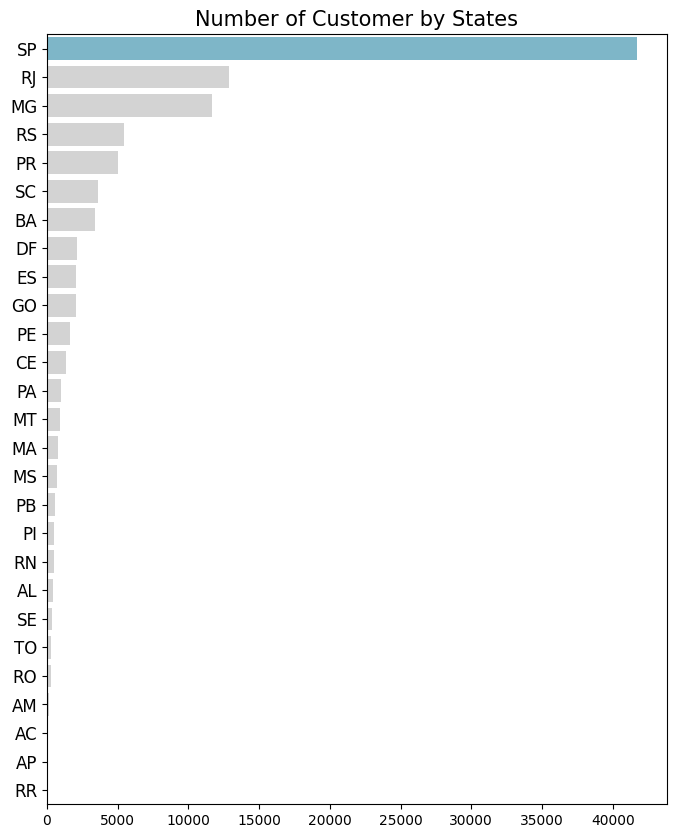

In [196]:
bystate_df = customers_dataset_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(8, 10))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 2:

C:\Users\ACER\AppData\Local\Temp\ipykernel_3704\1114596880.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ACER\AppData\Local\Temp\ipykernel_3704\1114596880.py:8: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


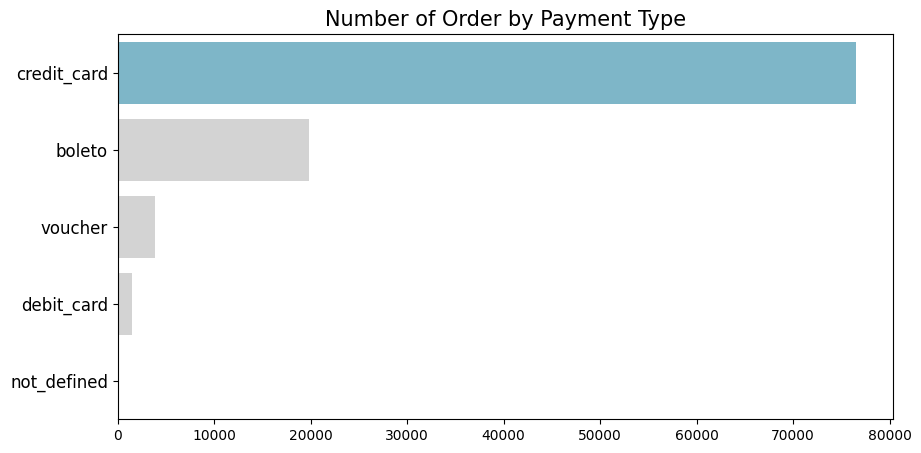

In [197]:
bypayment_df = order_payments_dataset_df.groupby(by="payment_type").order_id.nunique().reset_index()
bypayment_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)
bypayment_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="order_count", 
    y="payment_type",
    data=bypayment_df.sort_values(by="order_count", ascending=False),
    palette=colors_
)
plt.title("Number of Order by Payment Type", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- Pada proses ini menampilkan visualisasi serta menjadi jawaban dari pertanyaan 1 dan 2.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Jadi seperti yang telah dijabarkan dan divisualisasikan untuk daerah yang menghasilkan customer terbanyak hingga tersedikit bahwa SP menduduki daerah yang menghasilkan customer terbanyak dalam pengorderan, selanjutnya ada RJ, dan seterusnya hingga state RR yang menghasilkan customer paling sedikit diantara yang lainnya. Selain itu, terdapat perbandingan yang sangat jauh untuk state SP dari state-state lainnya.
- Conclution pertanyaan 2: Jadi metode pembayaran yang sering digunakan dalam proses pengorderan dari yang terbanyak hingga tersedikit ialah credit_card, selanjutnya boleto, disusul voucher, lalu debit_card, dan not_defined menduduki paling sedikit dengan sebanyak 0 kali.